# K-means++

## 核心算法

In [1]:
import numpy as np
import random

In [16]:
def nearest(point, cluster_centers):
    
#     得到目前聚类中心的个数
    m = cluster_centers.shape[0]
    
#     随机初始化最短距离
    min_dist = distance(point, cluster_centers[0, :])
#     选择最短的距离
    for i in range(m):
        d = distance(point, cluster_centers[i, :])
        if min_dist > d:
            min_dist = d

    return min_dist    

In [22]:
def distance(p1, p2):
    d = 0
    for i in range(len(p1)):
        d += (p1[i] - p2[i])**2
    return d

In [49]:
def get_cent(data, k):
    '''
    data: m个样本  shape:(m, n)
    k: k个聚类中心
    return: 初始化后的聚类中心
    '''
    
#    随机初始化一个点作为第一个聚类中心
    m, n = data.shape
    cluster_centers = np.zeros((k, n))
    
    index = np.random.randint(0, m)
    cluster_centers[0, :] = np.copy(data[index, :])
#     初始化距离序列
    d = np.zeros((m, ))
    
    for i in range(1, k):
        sum_all = 0
        for j in range(m):
#             对于k个聚类中心 寻找样本点最短距离
            d[j] = nearest(data[j, :], cluster_centers[0:i, :])
            sum_all += d[j]
#         轮盘法 
        sum_all *= random.random() # 生成实数 返回[0, 1)之间
#         获得区间内的样本点作为聚类中心点
        for j, d_min in enumerate(d):
            sum_all -= d_min
#             左闭右开区间
            if sum_all >= 0:
                continue
            cluster_centers[i, :] = data[j, :]
            break
    return cluster_centers

## 导入数据库

In [32]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

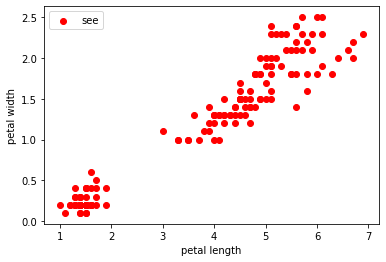

In [33]:
iris = load_iris()
X  = iris.data[:, 2:]
#绘制数据分布图
plt.scatter(X[:, 0], X[:, 1], c = "red", marker='o', label='see')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc=2)
plt.show()

In [38]:
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

## 进行聚类

In [50]:
k = 3
# 获取聚类中心点
centers = get_cent(X, k)
# 构造聚类器
estimator = KMeans(n_clusters = k, init = 'k-means++')
# 聚类
estimator.fit(X)
# 获取聚类标签
label_pred = estimator.labels_

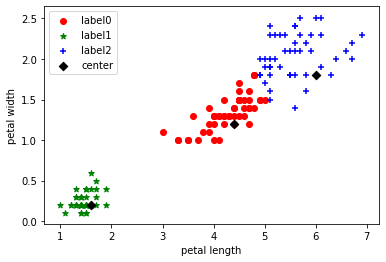

In [54]:
# 绘制效果
x0 = X[label_pred == 0]
x1 = X[label_pred == 1]
x2 = X[label_pred == 2]
plt.scatter(x0[:, 0], x0[:, 1], c = "red", marker = 'o', label = 'label0')
plt.scatter(x1[:, 0], x1[:, 1], c = "green", marker = '*', label = 'label1')
plt.scatter(x2[:, 0], x2[:, 1], c = "blue", marker = '+', label = 'label2')
# 绘制聚类中心
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', marker = 'D', label = 'center' )
plt.xlabel('petal length')
plt.ylabel('petal width')
# 使图例在左上方
plt.legend(loc = 2)
plt.show()